# Show atmospheric parameter vatiation VAOD, PWV , Ozone in LSST bands

- author Sylvie Dagoret-Campagne
- creation date October 5th 2020

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.axes_grid1 import host_subplot
import mpl_toolkits.axisartist as AA
import os,sys

from astropy.io import fits
import matplotlib.colors as colors
import matplotlib.cm as cmx
import matplotlib.dates as mdates
from matplotlib import gridspec
%matplotlib inline

In [20]:
# to enlarge the sizes
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (12, 8),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
plt.rcParams.update(params)

In [21]:
%load_ext autoreload
In [2]: %autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [22]:
sys.path.append("../../tools/atmanalyticsim") # go to parent dir

In [23]:
import libatmscattering as atm

In [24]:
# pysynphot
import pysynphot as S
pysynphot_root_path=os.environ['PYSYN_CDBS']
path_sed_calspec=os.path.join(pysynphot_root_path,'calspec')

In [25]:
import libPySynPhotSpectra as Spectra

In [26]:
def plot_param(iparam,ax,all_Yin,all_Yout,mode,nsig=10):
    """
    plot parameters
    
    iparam = 0,1,2,3 : VAOD,PWV,O3,CLD
    ax     = axis
    
    all_Yin : inverse transform of the input in the simulation
    all_Yout : inverse transform predicted parameters
    
    mode : 
    - 0 : Yout vs Yin
    - 1 : Yout - Yin vs Yin
    - 2 : (Yout - Yin)/Yin vs Yin
    
    """
    N=4 # color mode corres ponding to parameter
    jet = plt.get_cmap('jet')
    cNorm = colors.Normalize(vmin=0, vmax=N)
    scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=jet)
    all_colors = scalarMap.to_rgba(np.arange(N), alpha=1)

    xlabel=["VAOD in ","PWV in (mm)","Ozone in (dBU)","Cloud OD in "]
    ylabel=["value out","value rec - value in","$\delta V/V$"]
    ttitle=["Estimation of VAOD",
       "Estimation of PWV",
       "Estimation of Ozone",
       "Estimation of Cloud OD"]
     
    DY=all_Yout[:,iparam]-all_Yin[:,iparam]
    Y0=all_Yin[:,iparam]
    Y1=all_Yout[:,iparam]
    RY=DY/Y0
    
    if mode   ==0:  
        cm=ax.plot(Y0,Y1,"o",color=all_colors[iparam])
    elif mode ==1:
        
        mu = DY.mean()
        median = np.median(DY)
        sigma = DY.std()
        textstr = '\n'.join((
        '$\mu$={:.3g}'.format(mu),
        '$median$={:.3g}'.format(median),
        '$\sigma$={:.3g}'.format(sigma)))
        
       
        cm=ax.plot(Y0,DY,"o",color=all_colors[iparam])
        
        # these are matplotlib.patch.Patch properties
        props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)

        # place a text box in upper left in axes coords
        ax.text(0.05, 0.95, textstr, transform=ax.transAxes, fontsize=14,verticalalignment='top', bbox=props)
        
        ax.set_ylim(mu-nsig*sigma,mu+nsig*sigma)
        
    else:
        
        mu = RY.mean()
        median = np.median(RY)
      
        sigma = RY.std()
        
        
        textstr = '\n'.join((
        '$\mu$={:.3g}'.format(mu),
        '$median$={:.3g}'.format(median),
        '$\sigma$={:.3g}'.format(sigma)))
       
        
        
        cm=ax.plot(Y0,RY,"o",color=all_colors[iparam])
        
        # these are matplotlib.patch.Patch properties
        props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)

        # place a text box in upper left in axes coords
        ax.text(0.05, 0.95, textstr, transform=ax.transAxes, fontsize=14,verticalalignment='top', bbox=props)
            
        ax.set_ylim(mu-nsig*sigma,mu+nsig*sigma)    
            
    ax.grid()
    ax.set_title(ttitle[iparam])
    ax.set_xlabel(xlabel[iparam])
    ax.set_ylabel(ylabel[mode])

    
    ax.ticklabel_format(axis='y',style='sci', 
                          scilimits=None, 
                          useOffset=None, 
                          useLocale=None, 
                          useMathText=True)
    
    return cm
    

In [27]:
DATADIR="../../data/atm"

In [28]:
atmospheric_basename_files=os.listdir(DATADIR)

In [29]:
atmospheric_basename_files

['lsst_atm_10year_bintab.parquet',
 'lsst_atm_10year_01.fits',
 'lsst_atm_10year_bigimg.fits',
 'lsst_atm_10year_07.fits',
 'lsst_atm_10year_06.fits',
 'lsst_atm_10year_10.fits',
 'lsst_atm_10year_09.fits',
 'lsst_atm_10year_bintab.fits',
 'lsst_atm_10year_05.fits',
 'lsst_atm_10year_04.fits',
 'lsst_atm_10year_bintab_small.fits',
 'lsst_atm_10year_08.fits',
 'lsst_atm_10year_03.fits',
 '.ipynb_checkpoints',
 'lsst_atm_10year_02.fits']

In [30]:
input_file=os.path.join(DATADIR,'lsst_atm_10year_bigimg.fits')

In [31]:
hdu = fits.open(input_file)

In [32]:
hdr=hdu[0].header
data=hdu[0].data

In [33]:
hdr

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                  -64 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                  958                                                  
NAXIS2  =                 3651                                                  
NBATMSIM=                 3650                                                  
ID_NUM  =                    0                                                  
ID_YEAR =                    1                                                  
ID_AM   =                    2                                                  
ID_VAOD =                    3                                                  
ID_PWV  =                    4                                                  
ID_O3   =                    5                                                  
ID_CLD  =                   

In [34]:
NbAtmSimul=hdr['NBATMSIM']
idx_out_num=hdr['ID_NUM']
idx_out_year=hdr['ID_YEAR']
idx_out_am=hdr['ID_AM']
idx_out_vaod=hdr['ID_VAOD']
idx_out_pwv=hdr['ID_PWV']
idx_out_o3=hdr['ID_O3']
idx_out_cld=hdr['ID_CLD']
idx_out_res=hdr['ID_RES']

In [35]:
num=data[1:,idx_out_num]
year=data[1:,idx_out_year]
airmass=data[1:,idx_out_year]
vaod=data[1:,idx_out_vaod] # vertical aerosol depth
pwv=data[1:,idx_out_pwv]   # precipitable water vapor (mm)
o3=data[1:,idx_out_o3]     # ozone
cld=data[1:,idx_out_cld]   # clouds (not used)

In [42]:
# Extract wavelength Wavelength
wl=data[0,idx_out_res:]
transm=data[1:,idx_out_res:]

### Wavelength bins

In [37]:
file_wavelengthbins="WaveLengthBins.csv"

In [38]:
df=pd.read_csv(file_wavelengthbins,index_col=0)

In [39]:
NBFILTER=len(df)

In [40]:
FILTER_NAME=df["band"].values
WL_MIN=df["wl_min"].values
WL_MAX=df["wl_max"].values
WL_WIDTH=df["wl_wdth"].values

# Distribute in different filters the transmissions

In [43]:
all_wl_filt=[]
all_transm_filt=[]
for iband in np.arange(NBFILTER):
    wl_indexes=np.where(np.logical_and(wl>=WL_MIN[iband],wl<=WL_MAX[iband]))[0]
    wl_filt=wl[wl_indexes]
    transm_filt=transm[:,wl_indexes]
    all_wl_filt.append(wl_filt)
    all_transm_filt.append(transm_filt)

# Compute the average

In [57]:
all_transm_filt_average=[]
for iband in np.arange(NBFILTER):
    transm_filt_average=np.average(all_transm_filt[iband],axis=0)
    all_transm_filt_average.append(transm_filt_average)
        

# Plot

(0.0, 1.0)

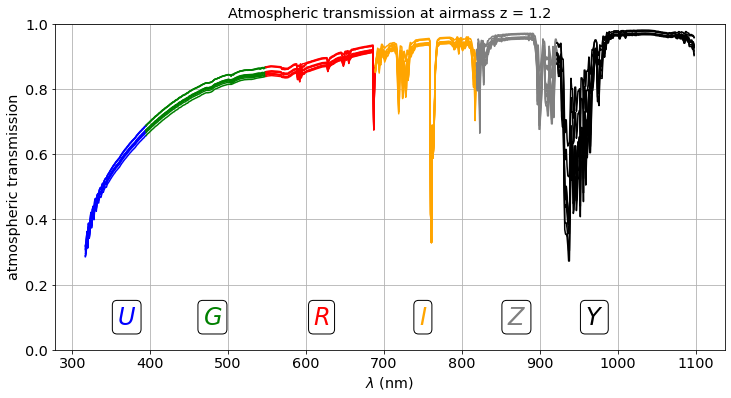

In [68]:
fig=plt.figure(figsize=(12,6))

ax=fig.add_subplot(1,1,1)
all_color = ["b","g","r","orange","grey","k"]
for iband in np.arange(NBFILTER):
        thewl=all_wl_filt[iband]
        for idx in np.arange(10):
            thetransm=all_transm_filt[iband][idx]
            plt.plot(thewl,thetransm,"-",color=all_color[iband])
 
ax.text(370, 0.1, r'$U$',
         {'color': 'blue', 'fontsize': 24, 'ha': 'center', 'va': 'center',
          'bbox': dict(boxstyle="round", fc="white", ec="black", pad=0.2)})
ax.text(480, 0.1, r'$G$',
         {'color': 'green', 'fontsize': 24, 'ha': 'center', 'va': 'center',
          'bbox': dict(boxstyle="round", fc="white", ec="black", pad=0.2)})
ax.text(620, 0.1, r'$R$',
         {'color': 'red', 'fontsize': 24, 'ha': 'center', 'va': 'center',
          'bbox': dict(boxstyle="round", fc="white", ec="black", pad=0.2)})
ax.text(750, 0.1, r'$I$',
         {'color': 'orange', 'fontsize': 24, 'ha': 'center', 'va': 'center',
          'bbox': dict(boxstyle="round", fc="white", ec="black", pad=0.2)})
ax.text(870, 0.1, r'$Z$',
         {'color': 'grey', 'fontsize': 24, 'ha': 'center', 'va': 'center',
          'bbox': dict(boxstyle="round", fc="white", ec="black", pad=0.2)})
ax.text(970, 0.1, r'$Y$',
         {'color': 'black', 'fontsize': 24, 'ha': 'center', 'va': 'center',
          'bbox': dict(boxstyle="round", fc="white", ec="black", pad=0.2)})

ax.grid()
ax.set_xlabel("$\\lambda$ (nm)")
ax.set_ylabel("atmospheric transmission")
ax.set_title("Atmospheric transmission at airmass z = 1.2")
ax.set_ylim(0,1)

(-0.1, 0.1)

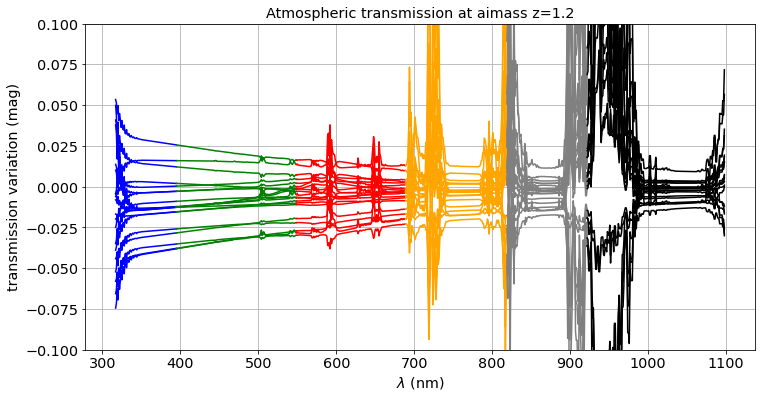

In [64]:
fig=plt.figure(figsize=(12,6))

ax=fig.add_subplot(1,1,1)
all_color = ["b","g","r","orange","grey","k"]
for iband in np.arange(NBFILTER):
        thewl=all_wl_filt[iband]
        for idx in np.arange(20):
            thetransm=all_transm_filt[iband][idx]
            thetransmav=all_transm_filt_average[iband]
            plt.plot(thewl,-2.5*np.log10(thetransm/thetransmav),"-",color=all_color[iband])
           
ax.grid()
ax.set_xlabel("$\\lambda$ (nm)")
ax.set_ylabel("transmission variation (mag)")
ax.set_title("Atmospheric transmission at aimass z=1.2")
ax.set_ylim(-0.1,0.1)


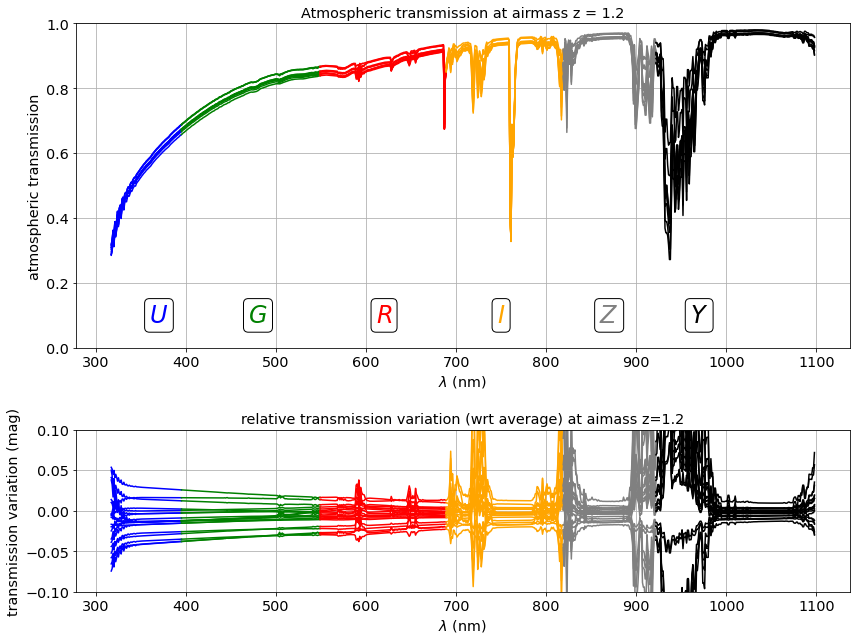

In [74]:
fig = plt.figure(figsize=(12, 9),constrained_layout=False)
gs = gridspec.GridSpec(nrows=2,ncols=1,height_ratios=[2,1],figure=fig)
ax = fig.add_subplot(gs[0,0])

all_color = ["b","g","r","orange","grey","k"]
for iband in np.arange(NBFILTER):
        thewl=all_wl_filt[iband]
        for idx in np.arange(10):
            thetransm=all_transm_filt[iband][idx]
            plt.plot(thewl,thetransm,"-",color=all_color[iband])
 
ax.text(370, 0.1, r'$U$',
         {'color': 'blue', 'fontsize': 24, 'ha': 'center', 'va': 'center',
          'bbox': dict(boxstyle="round", fc="white", ec="black", pad=0.2)})
ax.text(480, 0.1, r'$G$',
         {'color': 'green', 'fontsize': 24, 'ha': 'center', 'va': 'center',
          'bbox': dict(boxstyle="round", fc="white", ec="black", pad=0.2)})
ax.text(620, 0.1, r'$R$',
         {'color': 'red', 'fontsize': 24, 'ha': 'center', 'va': 'center',
          'bbox': dict(boxstyle="round", fc="white", ec="black", pad=0.2)})
ax.text(750, 0.1, r'$I$',
         {'color': 'orange', 'fontsize': 24, 'ha': 'center', 'va': 'center',
          'bbox': dict(boxstyle="round", fc="white", ec="black", pad=0.2)})
ax.text(870, 0.1, r'$Z$',
         {'color': 'grey', 'fontsize': 24, 'ha': 'center', 'va': 'center',
          'bbox': dict(boxstyle="round", fc="white", ec="black", pad=0.2)})
ax.text(970, 0.1, r'$Y$',
         {'color': 'black', 'fontsize': 24, 'ha': 'center', 'va': 'center',
          'bbox': dict(boxstyle="round", fc="white", ec="black", pad=0.2)})

ax.grid()
ax.set_xlabel("$\\lambda$ (nm)")
ax.set_ylabel("atmospheric transmission")
ax.set_title("Atmospheric transmission at airmass z = 1.2")
ax.set_ylim(0,1)

ax = fig.add_subplot(gs[1,0])
all_color = ["b","g","r","orange","grey","k"]
for iband in np.arange(NBFILTER):
        thewl=all_wl_filt[iband]
        for idx in np.arange(20):
            thetransm=all_transm_filt[iband][idx]
            thetransmav=all_transm_filt_average[iband]
            plt.plot(thewl,-2.5*np.log10(thetransm/thetransmav),"-",color=all_color[iband])
           
ax.grid()
ax.set_xlabel("$\\lambda$ (nm)")
ax.set_ylabel("transmission variation (mag)")
ax.set_title("relative transmission variation (wrt average) at aimass z=1.2")
ax.set_ylim(-0.1,0.1)

plt.tight_layout()
plt.savefig("atmvariation.png")
